### INTRODUCCIÓN

El objetivo del estudio es analizar el conjunto de datos de reservas de vuelos obtenido del sitio web "Ease My Trip" y llevar a cabo varias pruebas de hipótesis estadísticas con el fin de obtener información significativa. Se utilizarán distintos algoritmos de regresión para entrenar el conjunto de datos y predecir el precio de los pasajes. 
"Ease My Trip" es una plataforma en línea para reservar boletos de avión y, por lo tanto, es una herramienta que los viajeros potenciales utilizan para comprar boletos. Un estudio exhaustivo de estos datos ayudará en el descubrimiento de ideas valiosas que serán de gran beneficio para los pasajeros.

### PREGUNTAS DE INVESTIGACIÓN

El objetivo de nuestro estudio es responder a las siguientes preguntas de investigación:
* - ¿Varía el precio según la aerolínea?
* - ¿Cómo varía el precio del boleto entre las clases Economy y Business?
* - ¿Cómo se relaciona el precio de los boletos con el tiempo de anticipación en que son comprados?
* - ¿El precio del boleto cambia según la cantidad de paradas que tenga el vuelo?
* - ¿Varía el precio del boleto en función de la hora de salida y la hora de llegada?

### ACUMULACIÓN DE DATOS Y METODOLOGÍA

Se utilizó la herramienta de extracción Octoparse para recopilar datos del sitio web. Los datos se recopilaron en dos partes: una para los boletos de clase económica y otra para los boletos de clase ejecutiva. Se extrajeron un total de 300,261 opciones distintas de reservas de vuelos del sitio. Los datos se recopilaron durante 50 días, desde el 11 de febrero hasta el 31 de marzo de 2022. La fuente de datos fue secundaria y se obtuvo del sitio web de Ease My Trip.

### CONJUNTO DE DATOS

El conjunto de datos contiene información sobre opciones de reserva de vuelos del sitio web "Ease My Trip" para viajes en avión dentro de las 6 principales ciudades metropolitanas de la India. Hay 300.261 puntos de datos y 11 características en el conjunto de datos depurado.
[Fuente: Kaggle](https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction)


### CARACTERÍSTICAS

1) **Aerolínea:** El nombre de la aerolínea se almacena en la columna de la aerolínea. Es una característica categórica con 6 aerolíneas diferentes.

2) **Vuelo:** Vuelo almacena información sobre el código de vuelo del avión. Es una característica categórica.

3) **Origen:** Ciudad desde la cual despega el avión. Es una característica categórica con 6 ciudades únicas.

4) **Hora de Salida:** Esta es una característica categórica derivada obtenida mediante la agrupación de períodos de tiempo en contenedores. Almacena información sobre la hora de salida y tiene 6 etiquetas de tiempo únicas.

5) **Escalas:** Una característica categórica con 3 valores distintos que almacena la cantidad de escalas entre las ciudades de origen y destino.

6) **Hora de Llegada:** Pertenece a una característica categórica derivada creada mediante la agrupación de intervalos de tiempo en contenedores. Tiene seis etiquetas únicas y contiene información sobre la hora de llegada.

7) **Ciudad de Destino:** Ciudad donde aterrizará el vuelo. Es una característica categórica con 6 ciudades únicas.

8) **Clase:** Una característica categórica que comprende información sobre la categoría de asiento; tiene dos valores distintos: Business (Negocios) y Economy (Economía).

9) **Duración:** Una característica continua que muestra la cantidad total de tiempo que lleva viajar entre las ciudades en horas.

10) **Días Restantes:** Una característica derivada que se calcula restando la fecha de selección del viaje a la fecha de reserva.

11) **Precios:** La variable objetivo almacena información sobre el precio del boleto.


In [9]:
# Importo las librerías a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_selection import mutual_info_regression, SelectFromModel
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, learning_curve
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy import stats

Importo y exploro los datos para conocer su estructura, tipo y contenido

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/MatKlosz/FlightPricePrediction/main/Clean_Dataset.csv?token=GHSAT0AAAAAACIDAF5X3OFM4GBQ4JP2EXSQZI3G5BQ', index_col= 0)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 27.5+ MB


Tiene 11 Features y 300153 líneas
No tiene datos faltantes y hay 8 variables categóricas.

In [13]:
# Veamos los valores más frecuentes y otros detalles de las variables.
df.describe(include= 'all')


,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
count,300153,300153,300153,300153,300153,300153,300153,300153,300153.000000,300153.000000,300153.000000
unique,6,1561,6,6,3,6,6,2,NaN,NaN,NaN
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy,NaN,NaN,NaN
freq,127859,3235,61343,71146,250863,91538,59097,206666,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.221021,26.004751,20889.660523
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.191997,13.561004,22697.767366
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.830000,1.000000,1105.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.830000,15.000000,4783.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.250000,26.000000,7425.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.170000,38.000000,42521.000000


Vistara es la aerolinea más frecuente con el 43% de los vuelos.
Los vuelos con una parada en el viaje son los más frecuentes alcanzando el 84%.
En cuanto a los precios de los billetes de avión, como era de esperar la clase Economy es la más frecuente y el precio medio es de Rupias 20.889, aunque se observan valores outliars que habrá que evaluar.

<AxesSubplot:xlabel='price'>

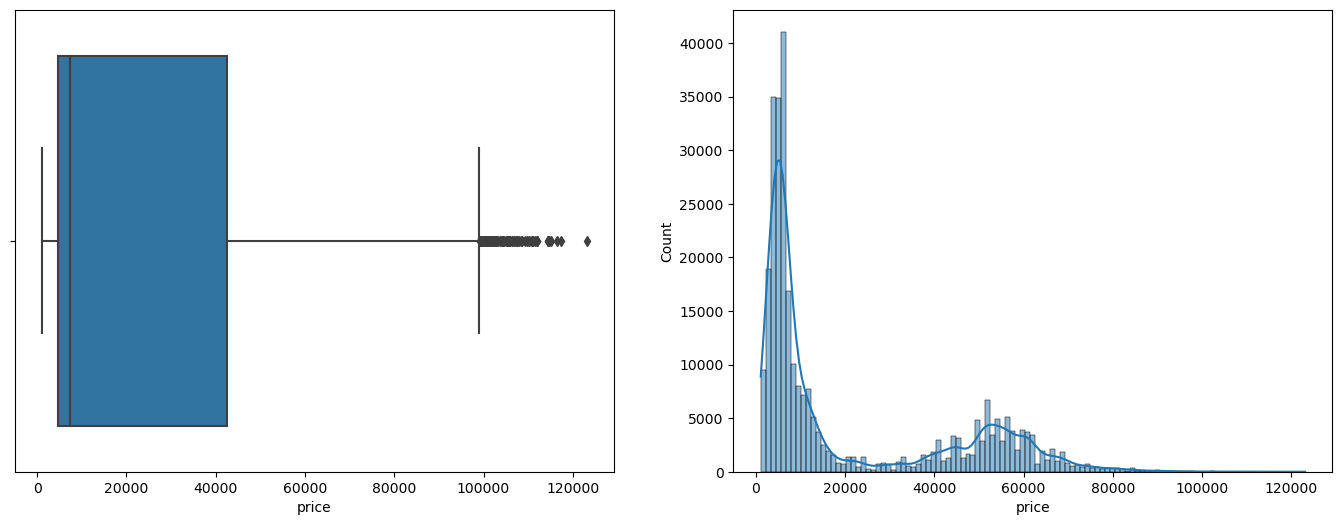

In [14]:
# Visualicemos en detalle la distribución de los precios.
plt.figure(figsize = (17,6))
plt.subplot(1,2,2)
sns.histplot(x = 'price', data = df, kde = True)
plt.subplot(1,2,1)
sns.boxplot(x = 'price', data = df)

A pesar de la media es de 20889, la mediana es 7500 debido a clases de boletos diferentes: ejecutiva y económica. En el segundo gráfico, hay dos curvas gaussianas en la dispersión. Esto sugiere segmentación de clientes y distribución sesgada hacia precios bajos en clase económica (la más popular). Importante para estrategias de precios y mercado.

Text(0.5, 1.0, 'Precios por clase y aerolínea')

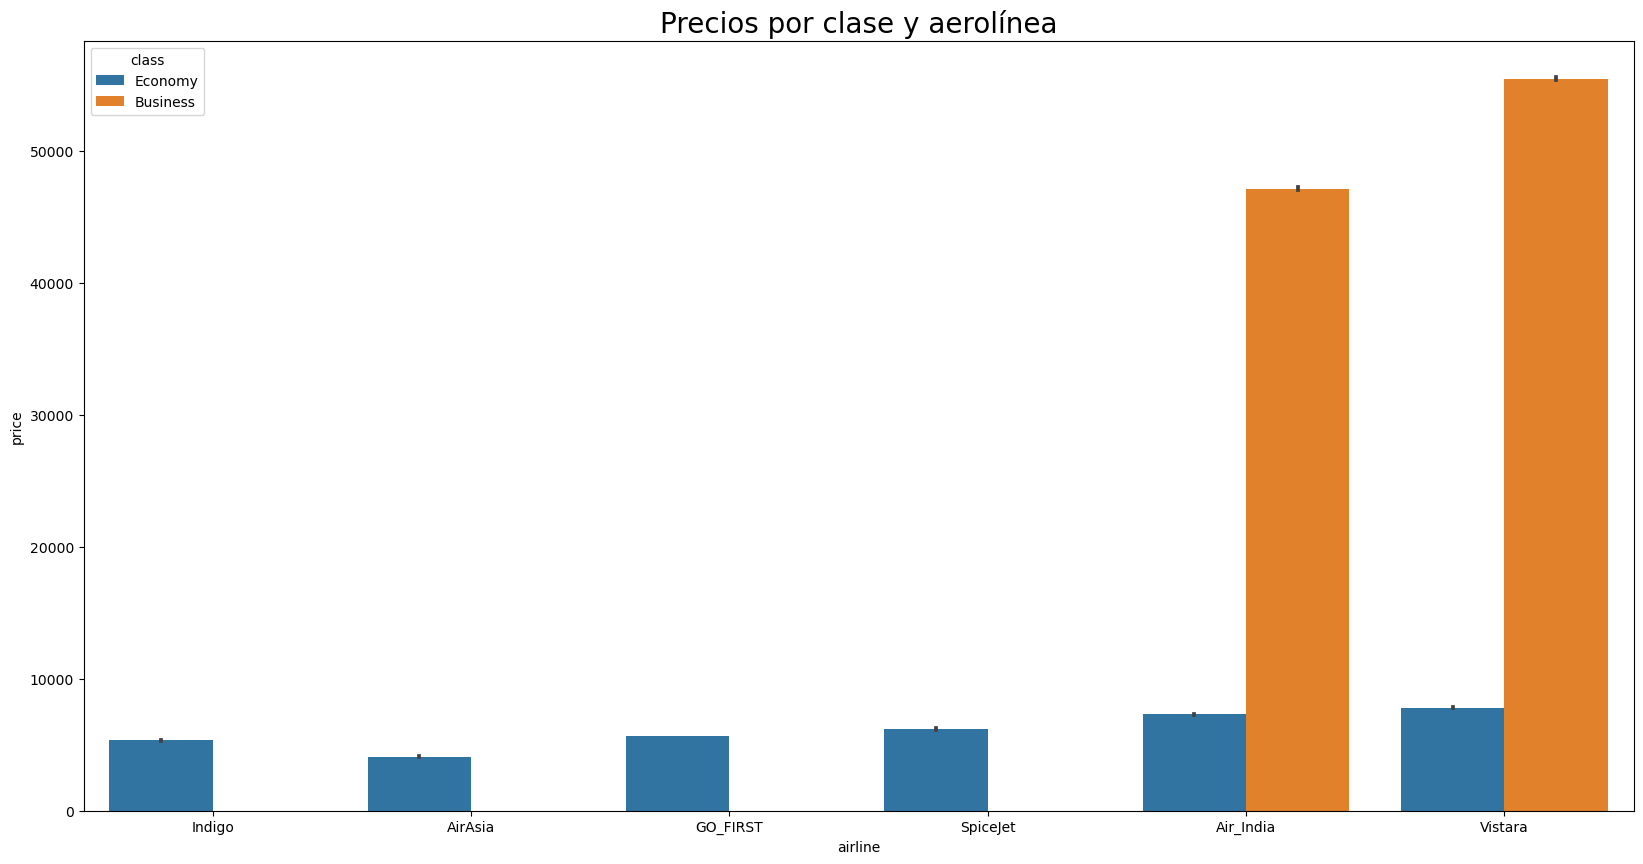

In [15]:
# Veamos a analizar los precios por categoría de boletos por separado y por compañía
plt.figure(figsize=(20, 10))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price")).set_title('Precios por clase y aerolínea',fontsize=20)

Los vuelos en clase Business son vendidos solo por dos compañías: Air_India y Vistara.
El precio de Business class es de más de 500% el precio de Economy Class.

In [16]:
# Busco visualizar en datos el comportamiento de las diferentes clases y Aerolíneas

# Filtro los datos para las clases "Economy" y "Business"
df_filtrado = df[df["class"].isin(["Economy", "Business"])]

# Agrupo los datos por clase y aerolínea, y calcula las métricas requeridas
resumen = df_filtrado.groupby(["class", "airline"])["price"].agg([
    ("Mínimo", "min"),
    ("Media", "mean"),
    ("Mediana", "median"),
    ("Máximo", "max")
]).reset_index()

# Muestro el cuadro resumen
print(resumen)

      class    airline  Mínimo         Media  Mediana  Máximo
0  Business  Air_India   12000  47131.039212  49613.0   90970
1  Business    Vistara   17604  55477.027777  56588.0  123071
2   Economy    AirAsia    1105   4091.072742   3276.0   31917
3   Economy  Air_India    1526   7313.682169   6082.0   42349
4   Economy   GO_FIRST    1105   5652.007595   5336.0   32803
5   Economy     Indigo    1105   5324.216303   4453.0   31952
6   Economy   SpiceJet    1106   6179.278881   5654.0   34158
7   Economy    Vistara    1714   7806.943645   6461.0   37646


Considerando las diferencias entre las diferentes clases, se observa una dispersión baja en los precios de clase Economy entre las aerolíneas, aunque Vistara y Air_India tienen un ticket promedio más alto respecto al resto de las aerolíneas para la clase Economy mostrando que apuntan a un segmento premium del mercado, seguramente ofreciendo un servicio diferencial.

Destacan en los extremos Vistara en clase Business con el valor más alto (Rupias 123071) que debería validarse y el menor precio (Rupias 1105) para GO_FIRST, Indigo y AirAsia.

VISUALIZAMOS LA DISTRIBUCIÓN DE LOS PRCIOS POR CLASE Y AEROLINEA

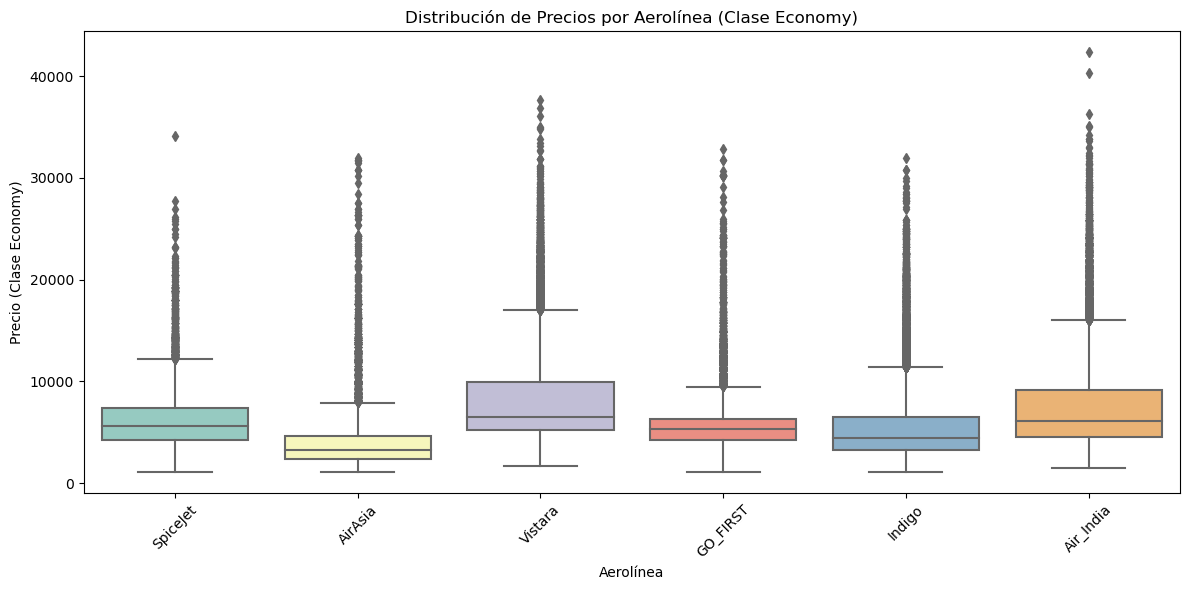

In [17]:
# Grafiquemos la distribución de los precios por clase Economy y Aerolínea

# Filtro los datos para la clase "Economy"
df_economy = df[df["class"] == "Economy"]

# Creo un gráfico de caja para mostrar la distribución de precios por aerolínea
plt.figure(figsize=(12, 6))
sns.boxplot(x="airline", y="price", data=df_economy, palette="Set3")
plt.xticks(rotation=45)
plt.xlabel("Aerolínea")
plt.ylabel("Precio (Clase Economy)")
plt.title("Distribución de Precios por Aerolínea (Clase Economy)")

# Ajusto el tamaño del gráfico
plt.tight_layout()
plt.show()



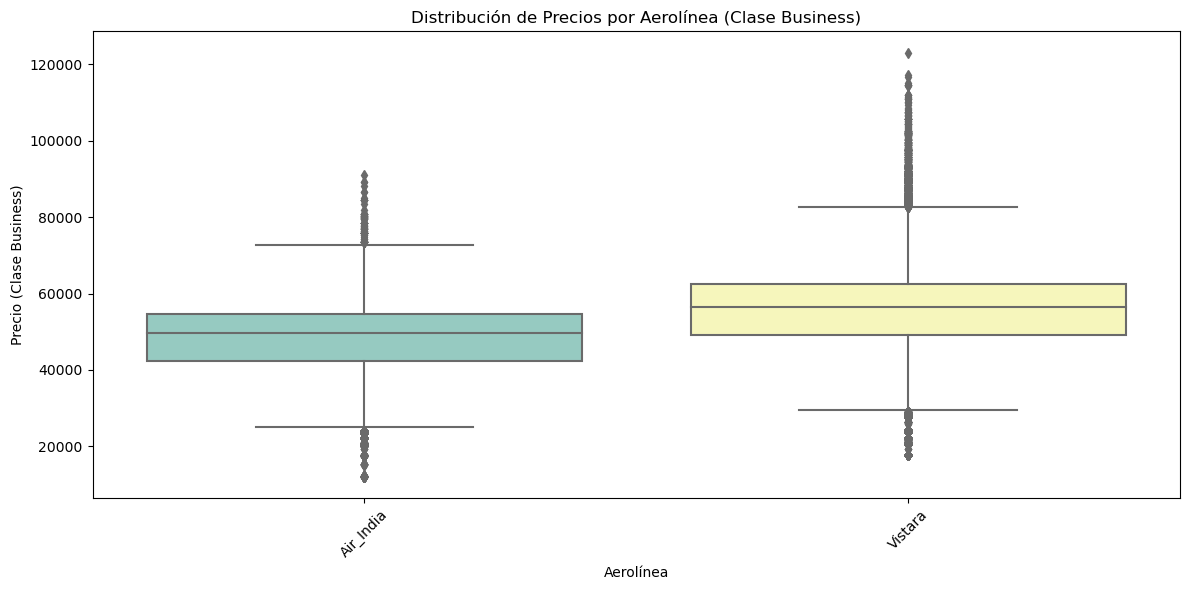

In [18]:
# Grafiquemos la distribución de los precios por clase Business y Aerolínea

# Filtro los datos para la clase "Business"
df_business = df[df["class"] == "Business"]

# Creo un gráfico de caja para mostrar la distribución de precios por aerolínea
plt.figure(figsize=(12, 6))
sns.boxplot(x="airline", y="price", data=df_business, palette="Set3")
plt.xticks(rotation=45)
plt.xlabel("Aerolínea")
plt.ylabel("Precio (Clase Business)")
plt.title("Distribución de Precios por Aerolínea (Clase Business)")

# Ajusto el tamaño del gráfico
plt.tight_layout()
plt.show()

Como vimos en el cuadro, los precios de Vistara en promedio son más altos y también tiene el precio de venta máximo y mínimo más alto entre las dos aerolíneas que venden Business.

SI COMPRO EL PASAJE CON ANTICIPACIÓN ¿SALE MÁS BARATO?

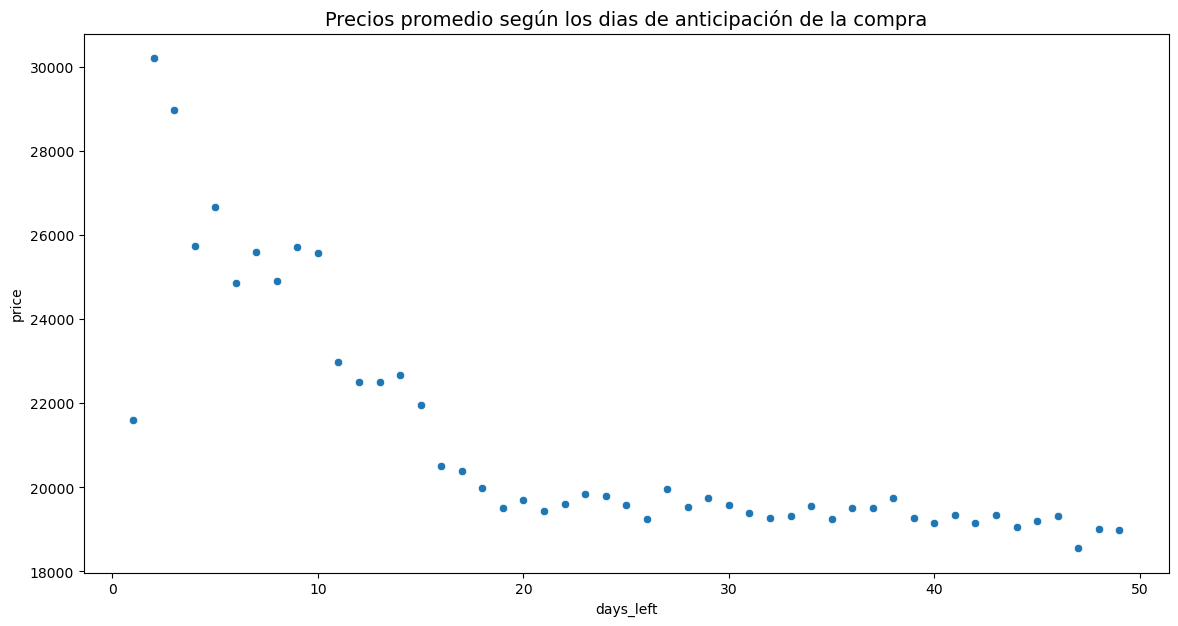

In [19]:
# Agrupo los precios según el campo "days_left"

df_temp = df.groupby(['days_left'])['price'].mean().reset_index()

# Grafico los puntos de precios promedio según su anticipación de compra en días
plt.figure(figsize=(14,7))
ax = sns.scatterplot(x="days_left", y="price", data=df_temp).set_title("Precios promedio según los dias de anticipación de la compra",fontsize=14)

Como la intuición indica, los precios se reducen de acuerdo a la mayor anticipación de la compra de los boletos, a medida que el vuelo se va ocupando las aerolíneas empiezan a subir los precios de los pasajes.
El punto de quiebre es sobre los 20 días de anticipación para comprar a un precio "bajo" en general para toda la industria y los precios mínimos están sobre los 50 días de anticipación.

Cabe destacar también el punto bajo que hay muy próximo al momento de la partida que ronda las Rupias 22000 promedio que muestra que las aerolíneas tratan de vender los lugares libres remanentes de forma que los vuelos salgan con su capacidad colmada.

¿CÓMO CAMBIAN LOS PRECIOS SEGÚN LA CANTIDAD DE PARADAS QUE TENGAN LOS VUELOS?

Text(0.5, 1.0, 'Precios por Aerolínea según la cantidad de paradas para clase Business')

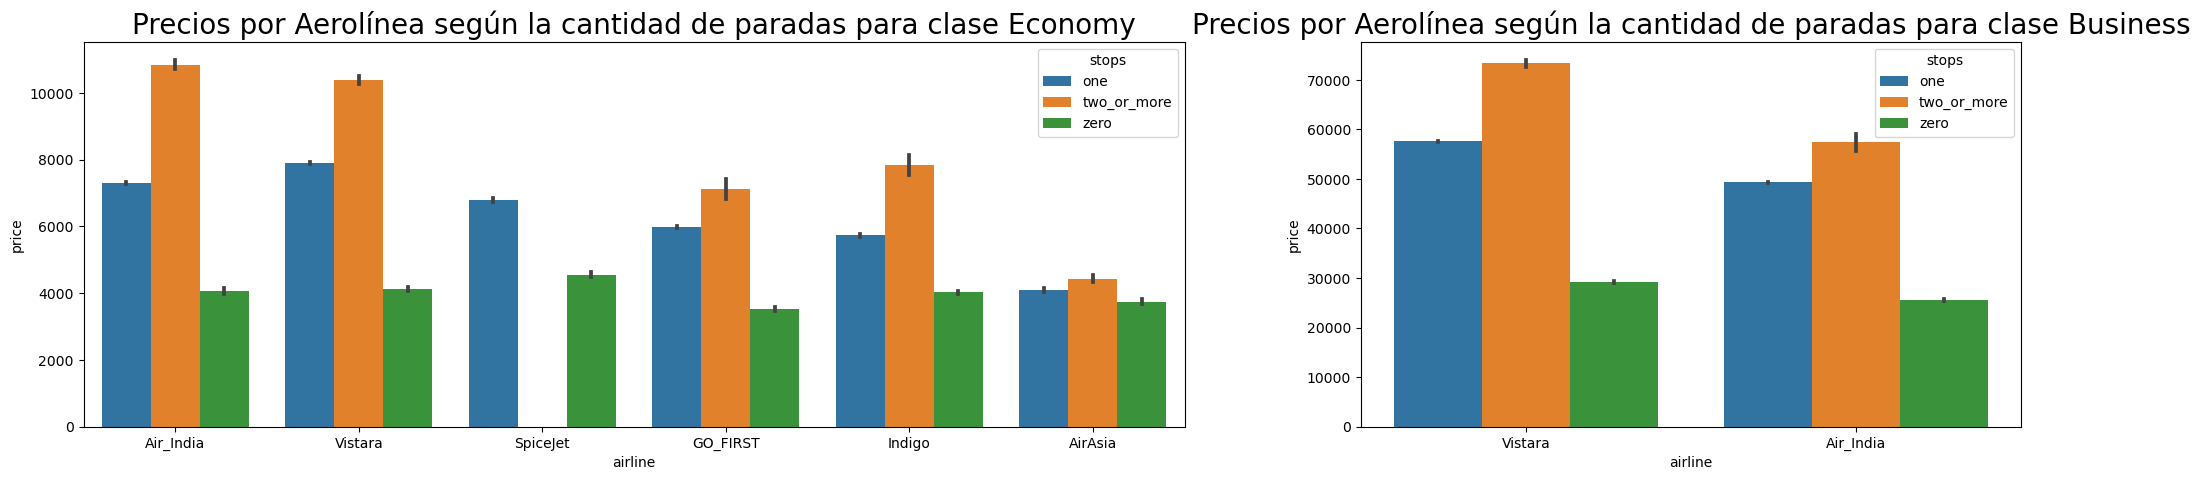

In [20]:
fig, axs = plt.subplots (1, 2, gridspec_kw={'width_ratios': [5, 3]}, figsize=(25, 5))
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Economy'].sort_values("price", ascending = False), ax=axs[0])
axs[0].set_title("Precios por Aerolínea según la cantidad de paradas para clase Economy",fontsize=20)
sns.barplot(y = "price", x = "airline",hue="stops",data = df.loc[df["class"]=='Business'].sort_values("price", ascending = False), ax=axs[1])
axs[1].set_title("Precios por Aerolínea según la cantidad de paradas para clase Business",fontsize=20)

La cantidad de paradas en los vuelos incrementa el precio.
Hay que destacar la paridad de precios que tiene AirAsia a diferencia de las otras compañías que no modifica tanto los precios según la cantidad de paradas y que Spicejet no realiza vuelos de más de una parada (esto puede deberse a que hace vuelos regionales o de corto alcance)

¿HAY DIFERENCIAS EN EL PRECIO DE LOS PASAJES SEGÚN EL HORARIO DE SALIDA O DE LLEGADA?

Text(0.5, 1.0, 'Precios basados en la hora de llegada')

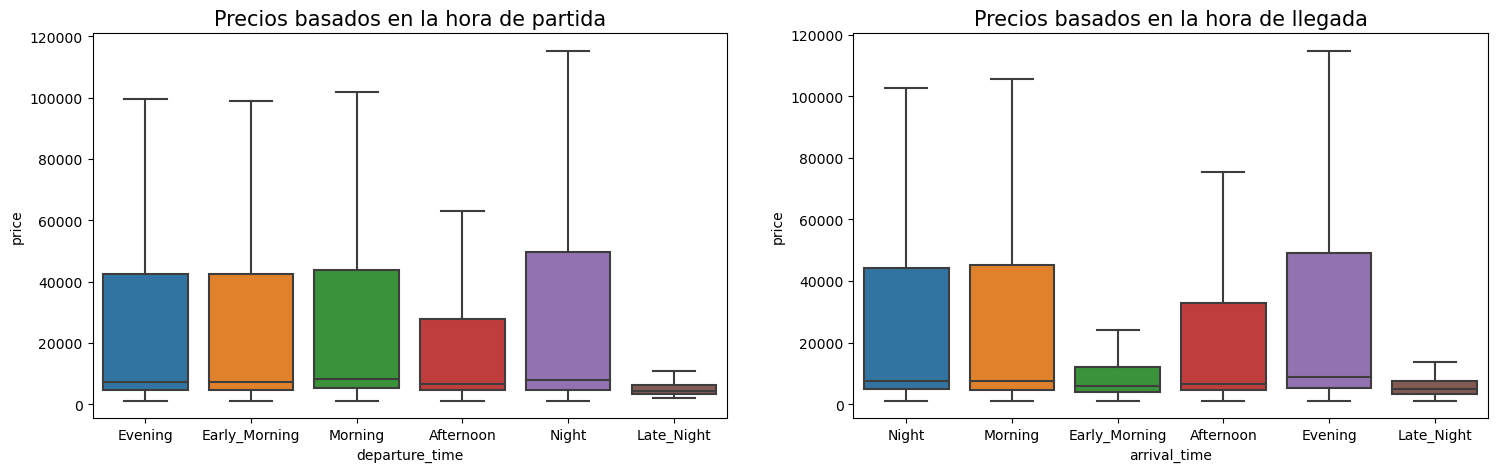

In [21]:
# Creo un gráfico con la distribución de los vuelos según su precio y el horario de llegada o de salida

plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="price", x="departure_time",showfliers=False).set_title("Precios basados en la hora de partida",fontsize=15)
plt.subplot(1,2,2)
sns.boxplot(data=df, y="price", x="arrival_time",showfliers=False).set_title("Precios basados en la hora de llegada",fontsize=15)

Salir o llegar durante la noche (Late_Night) sigue siendo la opción más económica para viajar. Además, llegar temprano en la mañana o volar por la tarde resulta más económico que hacerlo por la noche, la mañana o la tarde.

¿QUE VARIABLES SON LAS QUE TIENEN MAYOR INFLUENCIA EN LA DETERMINACIÓN DEL PRECIO?

In [22]:
# Limpio y ordeno el dataset

# Codifico las variables ordinales "stops" y "class"
df["stops"] = df["stops"].replace({'zero': 0, 'one': 1, 'two_or_more': 2}).astype(int)
df["class"] = df["class"].replace({'Economy': 0, 'Business': 1}).astype(int)

# Creo variables dummies para las variables categóricas
dummies_variables = ["airline", "source_city", "destination_city", "departure_time", "arrival_time"]
dummies = pd.get_dummies(df[dummies_variables], drop_first=True)
df = pd.concat([df, dummies], axis=1)

# Elimino las columnas originales que ya no se necesitan
df = df.drop(["flight", "airline", "source_city", "destination_city", "departure_time", "arrival_time"], axis=1)
 

In [23]:
df.head()

,stops,class,duration,days_left,price,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,departure_time_Early_Morning,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2.17,1,5953,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,5956,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


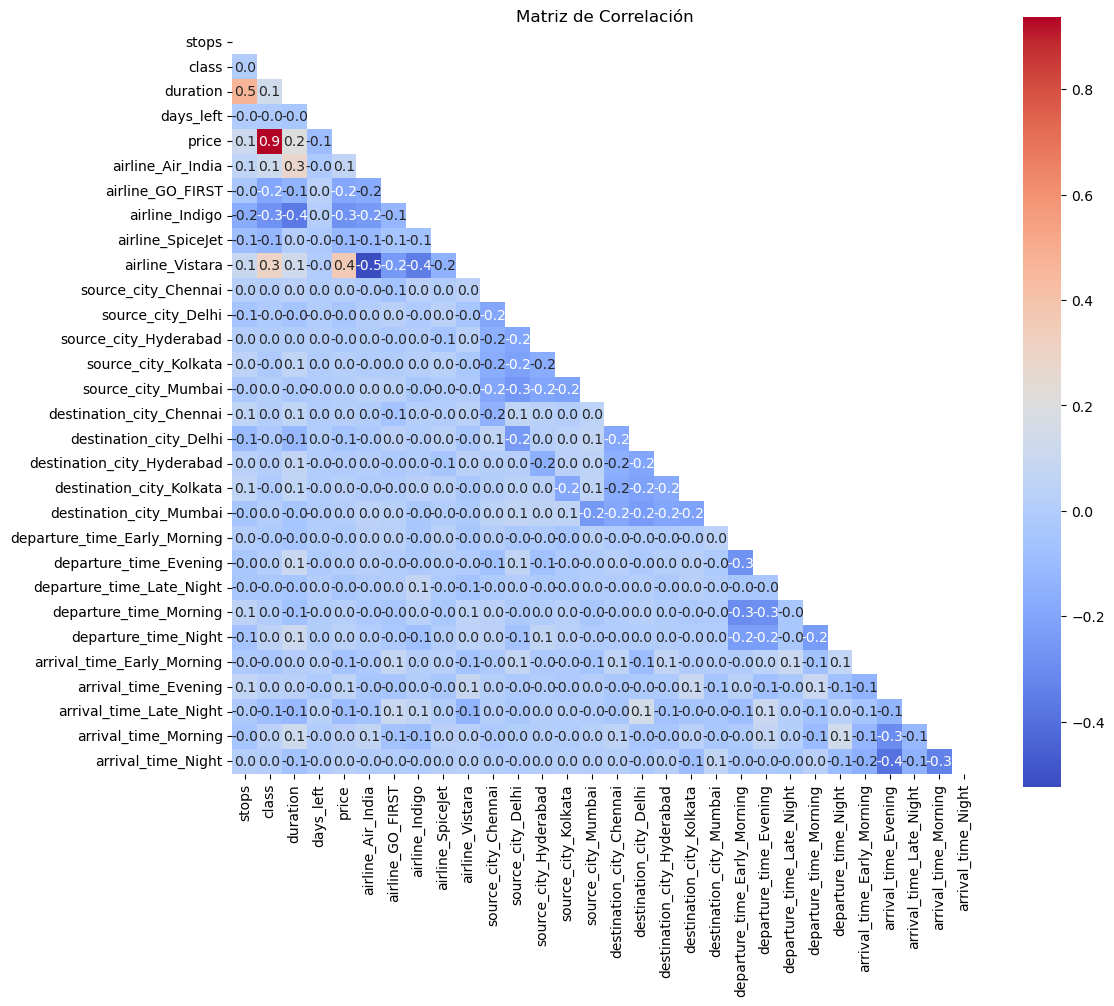

In [24]:

# Calculo la matriz de correlación
corr_matrix = df.corr()

# Creo una máscara triangular superior
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Configuro el tamaño de la figura
plt.figure(figsize=(12, 10))

# Creo un mapa de calor de la matriz de correlación
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt=".1f", cmap='coolwarm', cbar=True, square=True)

# Configuro el título
plt.title("Matriz de Correlación")

# Muestro el gráfico
plt.show()


Si bien la matriz muestra las relaciones lineales no se puede obtener mucha info de este gráfico y debemos buscar información en las relaciones no lineales, para eso vamos a aplicar: Mutual Information para conocer la dependencia entre las variables y el precio.

In [25]:

X = df.copy()
y = X.pop("price") # Defino la variable objetivo

# Factoriza las características categóricas
for colname in X.select_dtypes(["object", "category"]):
    X[colname], _ = X[colname].factorize()

# Todas las características discretas deben tener tipos de datos enteros
discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]

# Calculo los puntajes de información mutua para la regresión
mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)

# Creo una Serie de pandas para mostrar los resultados
mi_scores = pd.Series(mi_scores, name="Puntajes de Información Mutua", index=X.columns)

# Ordeno los puntajes en orden descendente
mi_scores = mi_scores.sort_values(ascending=False)

# Muestro los puntajes de información mutua
print(mi_scores)


duration                        2.416936
class                           0.618061
airline_Vistara                 0.516296
days_left                       0.477366
source_city_Delhi               0.431156
source_city_Mumbai              0.429834
airline_Air_India               0.403201
stops                           0.393255
destination_city_Delhi          0.387879
destination_city_Mumbai         0.382828
source_city_Kolkata             0.361059
source_city_Hyderabad           0.347045
destination_city_Kolkata        0.339032
source_city_Chennai             0.326053
destination_city_Hyderabad      0.321119
destination_city_Chennai        0.303286
airline_Indigo                  0.288444
airline_GO_FIRST                0.202520
arrival_time_Evening            0.126667
arrival_time_Night              0.107493
departure_time_Evening          0.104264
arrival_time_Morning            0.098781
departure_time_Morning          0.093396
departure_time_Early_Morning    0.086883
airline_SpiceJet

El análisis de Información Mutua indica que la clase (Economy / Business), la duración del vuelo (duration) y la cantidad de días de anticipación (days_left) tienen una fuerte relación con el precio del vuelo. Además, se observa que la variable que indica si la aerolínea es Vistara (airline_Vistara) también desempeña un papel importante en la predicción del precio del vuelo, mostrando una relación significativa, aunque no necesariamente lineal.

BUSCAREMOS EL MEJOR MODELO PARA PREDECIR EL PRECIO DE LOS PASAJES

In [26]:
# Separo las características (X) y la variable objetivo (y)
X = df.drop(columns=['price'])  # Ajusta el nombre de la columna de la variable objetivo
y = df['price'] # Defino la variable objetivo

# Divido el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalo las características para algoritmos sensibles a la escala
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inicializo los modelos de regresión
knn_regressor = KNeighborsRegressor()
linear_regressor = LinearRegression()
xgb_regressor = XGBRegressor()
random_forest_regressor = RandomForestRegressor()

# Lista de modelos para iterar
models = [knn_regressor, linear_regressor, xgb_regressor, random_forest_regressor]

# Lista para almacenar los resultados
results = []

# Entreno y evaluar cada modelo
for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    model_name = model.__class__.__name__
    results.append((model_name, rmse, r2))

# Ordeno los resultados en orden ascendente de RMSE
results.sort(key=lambda x: x[1])

# Muestro los resultados ordenados
for i, (model_name, rmse, r2) in enumerate(results, start=1):
    print(f"{i}. {model_name} - RMSE: {rmse}, R²: {r2}")

# Tarda entre 8 a 10 minutos en procesar (dependiendo de la capacidad computacional disponible)


1. RandomForestRegressor - RMSE: 32.931252360593604, R²: 0.9848126995237391
2. KNeighborsRegressor - RMSE: 43.045010384385485, R²: 0.9690518261658718
3. XGBRegressor - RMSE: 45.02641844088628, R²: 0.9755741327840389
4. LinearRegression - RMSE: 67.08734978774011, R²: 0.9099031138535913


- El modelo RandomForestRegressor ha demostrado un rendimiento sobresaliente con el RMSE más bajo (32.97) y el R² más alto (0.985) en comparación con los otros modelos. Estos resultados sugieren que RandomForestRegressor es altamente preciso y ofrece un ajuste sólido a los datos.

- El modelo XGBRegressor también presenta un buen rendimiento con un bajo RMSE y un alto R² (0.975). Esto indica una alta capacidad de predicción y ajuste.

- El modelo KNeighborsRegressor muestra un rendimiento respetable con un bajo RMSE (43.045) y un R² notable (0.969).

- En contraste, el modelo LinearRegression exhibe un rendimiento inferior en comparación con los otros modelos, como se refleja en su mayor RMSE y R² más bajo.

Finalmente, basándonos en las métricas de RMSE y R², el modelo RandomForestRegressor lidera en términos de rendimiento en este escenario. Esta superioridad puede atribuirse a la presencia de relaciones no lineales en el conjunto de datos, notables en variables como la duración del vuelo (duration) y el número de días restantes antes del vuelo (days_left). Como resultado, un enfoque algorítmico altamente adaptable, como el proporcionado por RandomForestRegressor, tiende a ofrecer resultados superiores en términos de precisión y ajuste a las relaciones subyacentes, además de ser menos sensible a valores atípicos (outliers) en los datos en comparación con XGBRegressor.

Realicemos un proceso de optimización para mejorar la performance de los modelos

In [31]:
# Inicializo los modelos a evaluar
random_forest_regressor = RandomForestRegressor(random_state=42)
xgb_regressor = XGBRegressor()

# Entreno los modelos
random_forest_regressor.fit(X_train_scaled, y_train)
xgb_regressor.fit(X_train_scaled, y_train)

# Calculo la importancia de las características para RandomForestRegressor
feature_importance_rf = random_forest_regressor.feature_importances_

# Calculo la importancia de las características para XGBRegressor
feature_importance_xgb = xgb_regressor.feature_importances_

# Selecciono las características más importantes usando umbral de 1%
sfm_rf = SelectFromModel(random_forest_regressor, threshold=0.01)
sfm_rf.fit(X_train_scaled, y_train)
selected_features_rf = X_train.columns[sfm_rf.get_support()]

sfm_xgb = SelectFromModel(xgb_regressor, threshold=0.01)
sfm_xgb.fit(X_train_scaled, y_train)
selected_features_xgb = X_train.columns[sfm_xgb.get_support()]

# Muestro las características seleccionadas
print("Características seleccionadas por RandomForestRegressor:")
print(selected_features_rf)

print("\nCaracterísticas seleccionadas por XGBRegressor:")
print(selected_features_xgb)

Características seleccionadas por RandomForestRegressor:
Index(['class', 'duration', 'days_left'], dtype='object')

Características seleccionadas por XGBRegressor:
Index(['class', 'duration', 'days_left', 'airline_Air_India',
       'source_city_Delhi'],
      dtype='object')


In [32]:
# Convierte los nombres de características seleccionadas en índices de columnas
selected_features_rf_indices = [X.columns.get_loc(col) for col in selected_features_rf]
selected_features_xgb_indices = [X.columns.get_loc(col) for col in selected_features_xgb]

# Utiliza los índices de columnas para seleccionar características en los conjuntos de entrenamiento y prueba
X_train_selected_rf = X_train_scaled[:, selected_features_rf_indices]
X_test_selected_rf = X_test_scaled[:, selected_features_rf_indices]

X_train_selected_xgb = X_train_scaled[:, selected_features_xgb_indices]
X_test_selected_xgb = X_test_scaled[:, selected_features_xgb_indices]

random_forest_regressor_selected = RandomForestRegressor(random_state=42)
xgb_regressor_selected = XGBRegressor()

random_forest_regressor_selected.fit(X_train_selected_rf, y_train)
xgb_regressor_selected.fit(X_train_selected_xgb, y_train)

# Calcula las predicciones con características seleccionadas
y_pred_rf_selected = random_forest_regressor_selected.predict(X_test_selected_rf)
y_pred_xgb_selected = xgb_regressor_selected.predict(X_test_selected_xgb)

# Calcula las métricas con todas las características
rmse_rf_all = np.sqrt(mean_absolute_error(y_test, random_forest_regressor.predict(X_test_scaled)))
r2_rf_all = r2_score(y_test, random_forest_regressor.predict(X_test_scaled))

rmse_xgb_all = np.sqrt(mean_absolute_error(y_test, xgb_regressor.predict(X_test_scaled)))
r2_xgb_all = r2_score(y_test, xgb_regressor.predict(X_test_scaled))

# Calcula las métricas con características seleccionadas
rmse_rf_selected = np.sqrt(mean_absolute_error(y_test, y_pred_rf_selected))
r2_rf_selected = r2_score(y_test, y_pred_rf_selected)

rmse_xgb_selected = np.sqrt(mean_absolute_error(y_test, y_pred_xgb_selected))
r2_xgb_selected = r2_score(y_test, y_pred_xgb_selected)

# Muestra las métricas
print("\nRandomForestRegressor - RMSE con todas las características:", rmse_rf_all)
print("RandomForestRegressor - R² con todas las características:", r2_rf_all)
print("RandomForestRegressor - RMSE con características seleccionadas:", rmse_rf_selected)
print("RandomForestRegressor - R² con características seleccionadas:", r2_rf_selected)

print("\nXGBRegressor - RMSE con todas las características:", rmse_xgb_all)
print("XGBRegressor - R² con todas las características:", r2_xgb_all)
print("XGBRegressor - RMSE con características seleccionadas:", rmse_xgb_selected)
print("XGBRegressor - R² con características seleccionadas:", r2_xgb_selected)






RandomForestRegressor - RMSE con todas las características: 32.969896585706344
RandomForestRegressor - R² con todas las características: 0.984773815117745
RandomForestRegressor - RMSE con características seleccionadas: 61.13071672465856
RandomForestRegressor - R² con características seleccionadas: 0.9214234189886611

XGBRegressor - RMSE con todas las características: 45.02641844088628
XGBRegressor - R² con todas las características: 0.9755741327840389
XGBRegressor - RMSE con características seleccionadas: 54.62660013077473
XGBRegressor - R² con características seleccionadas: 0.9516292771036968


Ambos modelos coinciden en la importancia de 'class', 'duration' y 'days_left'. Sin embargo, XGBRegressor considera dos características adicionales, 'airline_Air_India' y 'source_city_Delhi', como importantes para sus predicciones. Esto sugiere que, dependiendo del modelo a utilizar, se puede considerar estas características adicionales como relevantes para la predicción de precios de vuelos.

Rendimiento: el rendimiento de los modelos disminuye en términos de RMSE y R² en ambos modelos (RandomForestRegressor y XGBRegressor) cuando se trabaja solo con las características seleccionadas. Esto indica que las características eliminadas al seleccionar solo las más importantes también contienen información valiosa para la predicción.

Overfitting: es probable que los modelos originales (con todas las características) estén sobreajustando los datos, lo que explica el alto rendimiento en términos de R² pero un RMSE más bajo. Al seleccionar características, es posible que se esté reduciendo el overfitting, lo que resulta en un RMSE más alto pero un R² ligeramente más bajo.

Explicabilidad: al reducir la cantidad de características los modelos se vuelven más simples de explicar sin una pérdida significativa del poder de predicción.

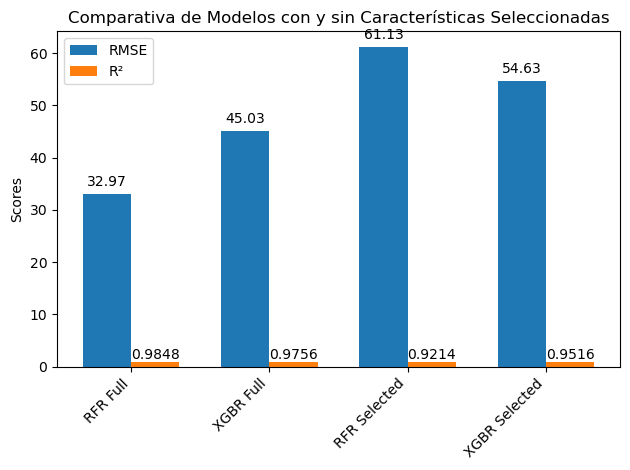

In [34]:
# Grafico los resultados para visualizar mejor las diferencias.

# Defino los nombres de los modelos y los indicadores
model_names = ['RFR Full', 'XGBR Full',
              'RFR Selected', 'XGBR Selected']

rmse_scores = [32.9699, 45.0264, 61.1307, 54.6266]  # RMSE scores en el mismo orden que model_names
r2_scores = [0.9848, 0.9756, 0.9214, 0.9516]  # R^2 scores en el mismo orden que model_names

# Creo un arreglo de índices para los modelos
x = np.arange(len(model_names))

# Ancho de las barras en el gráfico
width = 0.35

# Creo una figura
fig, ax = plt.subplots()

# Creo las barras para RMSE
bar_rmse = ax.bar(x - width/2, rmse_scores, width, label='RMSE')

# Creo las barras para R^2
bar_r2 = ax.bar(x + width/2, r2_scores, width, label='R²')

# Etiquetas para el eje X y título
ax.set_xticks(x)
ax.set_xticklabels(model_names, rotation=45, ha='right')
ax.set_ylabel('Scores')
ax.set_title('Comparativa de Modelos con y sin Características Seleccionadas')
ax.legend()

# Añado los valores numéricos en las barras
for i, v in enumerate(rmse_scores):
    ax.text(i - width/2, v + 1, f'{v:.2f}', ha='center', va='bottom')

for i, v in enumerate(r2_scores):
    ax.text(i + width/2, v + 0.01, f'{v:.4f}', ha='center', va='bottom')

# Muestro el gráfico
plt.tight_layout()
plt.show()


FINALMENTE: podemos concluir que los modelos RandomForestRegressor (RFR) y XGBRegressor (XGBR) tienen rendimientos muy buenos, siendo mejor RFR si se trabaja con todas las características logrando una precisión superior al 98% y con un error de Rupias 33 en la predicción del precio de los pasajes, que es muy bajo considerando que el precio medio de un billete para clase económica es de Rupias 5000 aproximadamente.

En cambio, si trabajamos solo con datos de seleccionados(class', 'duration', 'days_left', 'airline_Air_India','source_city_Delhi') el algoritmo que performa mejor es XGBR, con una precisión por encima del 95% y un error cuadrático de Rupias 54.